In [2]:
import pandas as pd
from app.runner import prepare_records
from app.algolia_functions import configure_algolia_index, prepare_dataset_for_algolia
from app.algolia_client import Client

INFO 59956 4480146944 2021-07-06 16:11:39,289 snowflake.connector.arrow_result.func_name not provided:0 - Failed to import optional packages, pyarrow


## Prepare data
Load records from snowflake (or file if cached), calculate Geohashes and Boundary coordinates

In [3]:
df = prepare_records()

INFO 59956 4480146944 2021-07-06 16:11:39,316 root.prepare_records:50 - Processed Datafile already exists, loading file...


## Constrain data
Make sure we don't explode our algolia budget and cast some incompatable types

In [4]:
data = prepare_dataset_for_algolia(df)

## Build index
Configure and load our dataset into our chosen index

In [5]:
client = Client()

In [5]:
configure_result = configure_algolia_index(client) # Set up fields we will be using for filtering. This only needs to happen once

In [12]:
print(f"Updated At: {configure_result[0]['updatedAt']}, TaskID: {configure_result[0]['taskID']}")

Updated At: 2021-07-01T01:58:06.454Z, TaskID: 15556782001


In [50]:
result = client.push(data) # This will erase and reload the dataset
result[0]['taskID']

15556382001

## Geohash analysis

<AxesSubplot:>

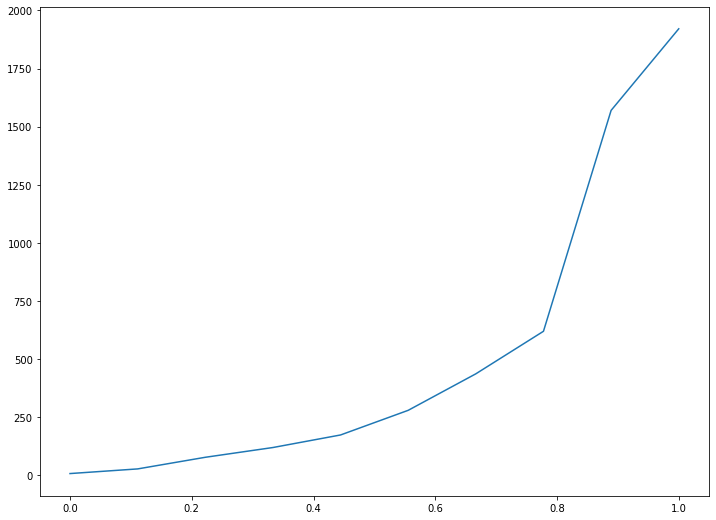

In [6]:
from numpy import linspace
df['geohash_count'] = df.geohashes.map(len)
df['geohash_count'].quantile(linspace(0,1,10)).plot(figsize=(12, 9))

Decile of the number of geohashes each listing contains